# The Battle of Neighborhoods- Project Final

### Idea of study: New Italian gourmet restaurant

### 1. Introduction

###### 1.1  Background 

Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,954,024 as of July 2018. Current to 2016, the Toronto census metropolitan area, of which the majority is within the Greater Toronto Area, held a population of 5,928,040, making it Canada's most populous CMA. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario. 

Toronto encompasses a geographical area formerly administered by many separate municipalities. These municipalities have each developed a distinct history and identity over the years, and their names remain in common use among Torontonians. Former municipalities include East York, Etobicoke, Forest Hill, Mimico, North York, Parkdale, Scarborough, Swansea, Weston and York. Throughout the city there exist hundreds of small neighbourhoods and some larger neighbourhoods covering a few square kilometres. 



###### 1.2 Problem

The next project seeks to find the best area to open a new Gourmet Italian restaurant in the capital of Ontario Canada, Toronto. The goal of this exploratory study is to provide an tentative areas of greater sale and less competitiveness. Venice is a family restaurant of traditional Italian food that aims to differentiate itself from the rest of the restaurants in the municipality of Toronto through its gourmet gastronomic offer and made with the best local and organic products.

Although there is a wide variety of restaurants throughout the old Toronto, York and North York area, that range from Mexican food to Asian, our study focused on finding Italian competition and how to make this restaurant different from the others with a unique offer for the most demanding palates but also continuing with the idea of giving and having the best organic products in the area. 




###### 1.3 Interest

Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Based on the above, our study is limited to Toronto and Metropolitan area because the level of international business success is fruitful for investors. 



### 2. Data description

###### 2.1 Data sources

In this study the data will be collected in multiple ways, through the Foursquare Technology System and data collected from Toronto Open Data
as well as data collection in segmentation and clustering.

The data from Foursquare will be used in the areas of great tourism as they are Old Toronto, York and North York, using the geolocation data in Foursquare we will find the Italian gourmet restaurants in the area as well as: tips, comments, distances, menu and rating and this data will be semi-structured, which is data that do not have a defined format, what they have are labels that facilitate separate one data from another. 

For the analysis process this data must be stored in databases and be SQL or NOSQL databases, to be processed and extract a result which will be stored in them and would proceed to an analysis of results and subsequent results modeling.

The IMB Jatson Studio system will be used for data modeling, which is an easy-to-use data analysis and modeling tool. For our specific case the information and the analysis is based on customer requirements that is primarily knowing the competence and feasibility of opening a new restaurant in the area.

###### 2.2 Data cleaning

Before analysis the gathered data was prepared. The dataset was checked for missing data and outliers. For this the “outlier labeling rule” was used. All values outside the calculated range were considered outliers (Hoaglin & Iglewicz, 1987). The data was then analyzed using statistical software Watson IBM.

### 3. Metodology

In the following exploratory study of quantitative character it will help us to know the situation of the food sector of the municipality. As well as, analyze our competitors and the possible clientele that interests us for our business. The model has been designed based on a clutsering for segmentation (K-means), because we are interested in doing an exploratory study with unspervised data.

As a database, I used GitHub repository in my study. My master data which has the main components Borough, Average House Price, Latitude and Longitude informations of the city.

###### 3.1 Exploratory Data Analysis

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of the best places for the new restaurant. The choice is made based on the demands imposed: proximity to other restaurants of the same category, other restaurants of the same concept, menus, prices, rating, tourist area and purchasing value venues to Toronto. The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

     1.What is the area of Toronto with the best rental price that meets the established criteria?
     2.What kind of Italian restaurants exist in the area?
     3.What is the rating per restaurant of the same category?
     4.What differentiates the other restaurants from our business plan?

###### 3.2 Metodology execute - Mapping Data

This is the first section of the final project of Applied Data Science Capstone. 
First we will import the libraries that we will need. 

I used python beautyfolSoup and CSV library to visualize geographic details of Toronto and its boroughs and I created a map of the capital with boroughs superimposed on top. I used latitude and longitude values to get the visual as below

In [2]:
import numpy as np #library to handle data in a vectorized manner 
import pandas as pd #library for data analsysis  
import requests #Library for web scraping 

print('Libraries imported.')   

Libraries imported.


##### 3.2.2 Notebook book created

In [3]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv

print('BeautifulSoup  & csv imported.')

BeautifulSoup  & csv imported.


In [4]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

print('SSL certificate errors ignored.') 

SSL certificate errors ignored.


##### 3.2.3 Web page scraped

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(source, 'lxml')

#print(soup.prettify())
print('soup ready')


soup ready


In [9]:
table = soup.find('table',{'class':'wikitable sortable'})

In [10]:
table_rows = table.find_all('tr') 

In [11]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()] 

##### 3.2.1 Data transformed into pandas dataframe

This method was easier than the Beautiful Soup but I put the Beautiful Soup method in the following blocks to meet the requirement of the assignment. The dataframe will consist of three columns: postalcode, borough, and neighborhood. 

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import requests

In [ ]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

r = requests.get(url, headers=header)

tables = pd.read_html(r.text) 

In [28]:
df=pd.DataFrame(tables[0])


df.columns=['Postcode','Borough','Neighbourhood']

df.drop([0],axis=0,inplace=True)

df.reset_index()


df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)

df1=df.groupby("Postcode").agg(lambda x:','.join(set(x)))

df1.loc[df1['Neighbourhood']=="Not assigned",'Neighbourhood']=df1.loc[df1['Neighbourhood']=="Not assigned",'Borough']

df1.shape

(103, 2)

In [29]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(requests.get(url).text,'lxml')
My_table = soup.find('table',{'class':'wikitable sortable'})

My_table
table_rows = My_table.find_all('tr')

t=[]
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.rstrip('\n') for tr in td]
    t.append(row)
df=pd.DataFrame(t)

df.columns=['Postcode','Borough','Neighbourhood']

df.drop([0],axis=0,inplace=True)

df.reset_index()

df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)

df1=df.groupby("Postcode").agg(lambda x:','.join(set(x)))


df1.loc[df1['Neighbourhood']=="Not assigned",'Neighbourhood']=df1.loc[df1['Neighbourhood']=="Not assigned",'Borough']

df1.shape
df1

,Borough,Neighbourhood
Postcode,,
M1B,Scarborough,"Rouge,Malvern"
M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
M1E,Scarborough,"Morningside,Guildwood,West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"Kennedy Park,East Birchmount Park,Ionview"
M1L,Scarborough,"Golden Mile,Clairlea,Oakridge"
M1M,Scarborough,"Cliffside,Scarborough Village West,Cliffcrest"


##### 3.2.4 Latitude and the longitude coordinates of each neighborhood.

Now that you have built a dataframe of the postal code of each neighborhood, we need to get the latitude and the longitude coordinates of each neighborhood.  


In [30]:
geo_data=pd.read_csv("https://cocl.us/Geospatial_data")
geo_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [31]:
df1['Latitude']=geo_data['Latitude'].values
df1['Longitude']=geo_data['Longitude'].values

df1

,Borough,Neighbourhood,Latitude,Longitude
Postcode,,,,
M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
M1E,Scarborough,"Morningside,Guildwood,West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476
M1J,Scarborough,Scarborough Village,43.744734,-79.239476
M1K,Scarborough,"Kennedy Park,East Birchmount Park,Ionview",43.727929,-79.262029
M1L,Scarborough,"Golden Mile,Clairlea,Oakridge",43.711112,-79.284577
M1M,Scarborough,"Cliffside,Scarborough Village West,Cliffcrest",43.716316,-79.239476


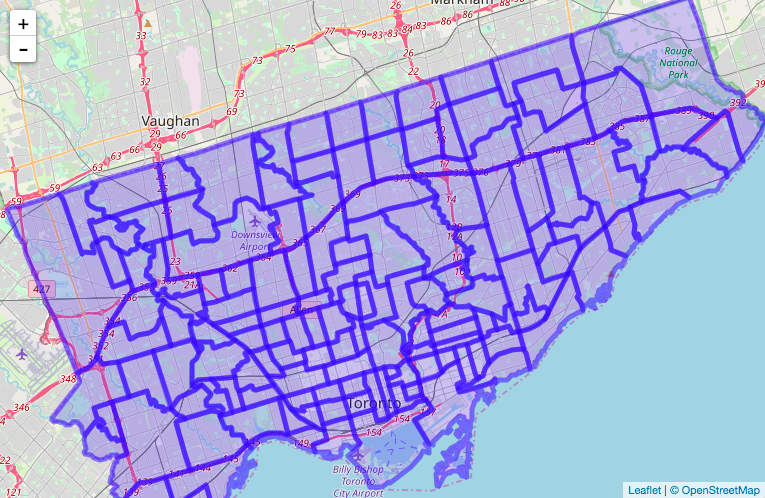

###### 3.2.5  Calculation of target variable

In this section the libraries to work with Foursquere will be exported and our traget will be analyzed

In [1]:
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
  client_id='AXCINZQNGFW3L0KWQFQS2PQOXLVJV0T5NI1WEI4BSHNVNY55',
  client_secret='5ZTY3VZBZX1I0TJ352EM14DFDG5NUQX52DWPIRFYR51TWXVB',
  v='20180323',
  ll='40.7243,-74.0018',
  query='restaurant',
  limit=1
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)


In [2]:
!wget -q -O 'Neighbourhoods.json' https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/neighbourhoods/resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15/view/3d8fdd31-9628-4322-b2f8-d709cd346406
print('Data downloaded!')

Data downloaded!


In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [ ]:
!wget -q -O 'Neighbourhoods.json' https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/neighbourhoods/resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15/view/3d8fdd31-9628-4322-b2f8-d709cd346406
print('Data downloaded!')

### 4. Results 

I utilized the Foursquare API to explore the boroughs and segment them. I designed the limit as 100 venue and the radius 750 meter for each borough from their given latitude and longitude informations. Here is a head of the list Venues name, category, latitude and longitude informations from Forsquare API.

Most restaurant locations are distributed throughout the Old Toronto area, although we discovered that the most prestigious area is the one that is found in lawrence park, where there are only 3 Italian restaurant.

Another one of the exclusive zones is Lawrence Hights where there are stores like chanel, diesel, Lacoste, Hugo Boss etc. Are only 1 Italian restaurant, that is not Gourmet and a bad rating by its consumers.

###  5. Conclusion

To finish this study we can say that the most successful areas are in Nort York, Lawrence Park and North York, Lawrence Hights.The competition does not offer any gourmet service or elaborated by local and organic products.

### 6. Discussion
